In [162]:
import torch
import pickle
import numpy as np
from pathlib import Path
from lxml import etree
from scipy.special import softmax

In [17]:
great_gatsby_path = Path("/home/cpethe/stonybook-data/gutenberg/processed/64317/character_coref_annotated.xml")
root = etree.parse(str(great_gatsby_path))
sents = []
for s in root.iter('s'):
    sent = []
    for t in s.iter('t'):
        sent.append(t.text)
    sents.append(sent)

In [2]:
detection_path = Path("/home/allekim/ocr-detection/ocr_detection/")
correction_path = Path("/home/allekim/ocr-detection/ocr_correction/")

In [6]:
detection_test = torch.load(detection_path / 'tok_test_dataset')

In [9]:
with open(correction_path / 'results.pkl', 'rb') as f:
    correction_test = pickle.load(f)

In [14]:
x = set(detection_test[0])

In [13]:
y = set([x[0] for x in correction_test])

# Test Book

In [193]:
def map_subtok_to_tok_idx(offsets):
    idx_mapping = []
    tok_num = -1
    for idx, pair in enumerate(offsets):
        s, e = pair
        if e == 0:
            continue
        if s == 1:
            tok_num += 1
        idx_mapping.append(tok_num)
    return idx_mapping

In [163]:
inputs = torch.load('/home/allekim/stonybook-data/guten_hathi_alignment/2276/uc2.ark+=13960=t80k2cd8d_hathi_input.dt')
results = torch.load('/home/allekim/stonybook-data/guten_hathi_alignment/2276/uc2.ark+=13960=t80k2cd8d_hathi_results.dt')
preda = softmax(results.predictions, axis=-1)
confidence = np.max(preda,-1)

In [168]:

pos_idx = np.where(preda[:,:,1] > thres)[0]
preds = np.zeros(len(preda))
preds[pos_idx] = 1

In [165]:
preds

array([1., 1., 1., ..., 1., 1., 0.])

In [169]:
len(inputs[idx]['sent'])

27

In [204]:
num_errors = 0
thres = 0.95
for idx in range(len(inputs)):
    mask = np.where(np.array(inputs[idx]['attention_mask']) == 1)
    input_ids = np.array(inputs[idx]['input_ids'])[mask][1:-1]
    offsets = np.array(inputs[idx]['offset_mapping'])[mask]
    subtok_to_tok = np.array(map_subtok_to_tok_idx(offsets))
    
    preds = np.array(preda[idx])[mask][1:-1]
    pos_idx = np.where(preds[:,1] > thres)[0]
    pred = np.zeros(len(preds))
    pred[pos_idx] = 1
    if 1 in pred:
        pred_mask = np.where(pred==1)
        indices = subtok_to_tok[pred_mask]
        indices = sorted(set(indices))
        print(indices)
        ocr_toks = np.array(inputs[idx]['sent'])[indices]
        print(inputs[idx]['sent'])
#         print(preds)
#         print(pos_idx)
#         print(pred)t
#         print(pred_mask)
#         print(preds[pred_mask,1])
        print(ocr_toks)
        print()
        num_errors += 1
        

[25]
['There', 'is', 'a', 'range', 'of', 'high', 'mountains', 'bordering', 'on', 'Annandale', ',', 'Ettrick', 'Forest', ',', 'and', 'Twceddale', ',', 'that', 'are', 'by', 'many', 'degrees', 'the', 'wildest', ',', 'tlic', 'most', 'rugged', ',', 'and', 'inaccessible', 'in', 'the', 'south', 'of', 'Scotland', '.']
['tlic']

[9]
['They', 'being', 'however', 'all', 'Westland', 'men', ',', 'were', 'consequently', 'y', 'utterly', 'unacquainted', 'with', 'the', 'inhabitants', 'of', 'the', 'country', 'in', 'which', 'they', 'had', 'taken', 'shelter', '.']
['y']

[16]
['At', 'length', 'the', 'hiders', 'became', 'so', 'numerous', 'that', 'it', 'was', 'impracticable', 'to', 'keep', 'themselves', 'altogether', 'concealed', 'd', 'from', 'the', 'people', 'of', 'the', 'country', '.']
['d']

[18]
['Chance', 'brought', 'them', 'in', 'contact', 'with', 'the', 'men', ',', 'while', 'sickness', 's', 'and', 'utter', 'necessity', 'often', 'drove', 'the', 'suflTerers', 'to', 'make', 'their', 'appeal', 'to', 'the

[2, 9, 11, 20]
['The', 'family', 'wan', 'alarmed', ',', 'and', 'gathered', 'out', 'to', 'sec', 'what', 'waii', 'the', 'matter', ',', ',', 'and', 'behold', 'there', 'lay', 'fxwr', 'Kennedy', 'in', 'a', 'meet', 'piteous', 'plight', ',', 'and', ',', 'in', 'fact', ',', 'stark', 'staring', 'mad', '.']
['wan' 'sec' 'waii' 'fxwr']

[2]
['He', 'wa', '<<', '.']
['<<']

[1, 7]
["'", 'Ifcings', ',', 'with', 'green', 'clothes', 'and', 'idue', 'faces', ',', '\\', 'in', 'a', 'circle', 'round', 'a', 'small', 'golden', 'lamp', ',', 'gaping', 'and', 'singing', 'with', 'the', 'most', 'eldritch', 'yells', '.']
['Ifcings' 'idue']

[12]
['In', 'one', 'instant', 't', 'all', 'became', 'dark', ',', 'and', 'he', 'felt', 'a', 'weiirht', 'upon', 'his', 'breast', 'that', 'seemed', 'heavier', 'than', 'a', 'mountain', '.']
['weiirht']

[4]
['and', 'bore', 'him', 'away', 'throutrh', 'the', 'air', 'for', 'hundreds', 'of', 'miles', ',', 'amid', 'regions', 'of', 'utti', '-', 'r', 'darkness', ';', 'but', 'on', 'his', 'n

[12]
['Unfortunately', ',', 'her', 'daughter', ',', 'drawn', 'toward', 'her', 'by', 'filial', 'regard', 'and', 'afTection', ',', 'softly', 'then', 'entered', 'the', 'room', '.']
['afTection']

[7]
['Katharine', ',', ',', 'moved', 'by', 'a', 'natural', 'impul.se', '.']
['impul.se']

[14]
['At', 'length', 'Walter', 'rushed', 'in', 'and', 'seized', 'her', ',', 'ordering', 'his', 'weeping', 'daughter', 'instantly', 'y', 'to', 'bed', '.']
['y']

[15]
['Maron', 'thanked', 'heaven', 'for', 'this', 'wonderful', 'and', 'timely', 'deliverance', ',', 'and', 'persuaded', 'now', 'that', 'Providence', 'e', 'had', 'a', 'special', 'and', 'peculiar', 'charge', 'over', 'her', '.']
['e']

[27, 29, 41, 43, 46]
['She', 'did', 'not', 'actually', 'say', 'that', 'she', 'should', 'be', 'burned', 'alive', 'at', 'a', 'stake', ',', 'but', 'she', 'spake', 'of', 'the', 'trial', 'by', 'fire', ',', 'or', 'that', 'it', 'iniij', ';', 'ht', 'be', 'better', 'to', 'throw', 'her', 'into', 'the', 'lake', ',', 'to', 'make', 

[25, 27, 33, 40]
['say', 'I', ';', 'but', 'I', 'prophesy', 'and', 'say', 'unto', 'thee', ',', 'that', 'the', 'fii', '"', 'st', 'field', '-', 'meeting', 'into', 'which', 'thou', 'Till', '-', ':', 'BUOWNIK', 'OF', 'BOD.SBFX', "'", 'K.', 'goest', 'in', 'tlie', 'lieauty', 'of', 'holiness', ',', 'thou', 'shalt', 'be', 'estahlishcil', 'l', 'for', 'ever', 'with', 'tliy', 'one', 'foot', 'in', 'Dan', 'and', 'tlie', 'other', 'in', 'Beersheba', ',', 'and', 'shall', 'return', 'to', 'thy', 'respective', 'e', 'plaee', 'of', 'abode', 'as', 'rank', 'a', 'Whijj', 'as', 'ever', 'swung', 'in', 'the', 'CJriissuiarket', '.', '"']
['BUOWNIK' 'BOD.SBFX' 'lieauty' 'estahlishcil']

[15]
['am', 'I', 'always', 'to', 'be', 'trysted', 'with', 'boys', 'and', 'fools', 'V', 'He', 'then', 'began', 'and', 'e.xamined', 'the', 'goodwife', 'with', 'much', 'feigned', 'deference', 'and', 'civility', ',', 'which', 'so', 'pleased', 'her', 'that', 'she', 'told', 'him', 'everything', 'with', 'great', 'readiness', '.']
['e.xamin

[5, 6, 17, 23]
['Walter', 'often', 'said', 'that', 'he', 'wa', '*', 'an', 'ill', 'judge', 'of', 'the', 'cause', 'for', 'which', 'these', 'men', '(', 'suffered', ';', 'but', 'whatever', 'might', 'Ije', 'said', 'of', 'it', ',', 'they', 'were', 'heroes', 'in', 'that', 'cause', '.']
['wa' '*' '(' 'Ije']

[1, 3, 12, 13, 20, 21, 22]
['Their', 'complexioiuj', 'were', 'isallow', ',', 'and', 'bore', 'marks', 'of', 'famine', 'and', 'other', ']', 'irivatioiu', ';', 'their', 'beards', 'untrimmed', ':', 'their', 'aj', '>>', 'pan', '.']
['complexioiuj' 'isallow' ']' 'irivatioiu' 'aj' '>>' 'pan']

[0, 1, 7]
["'", 'l', 'all', 'in', 'ragn', ',', 'and', 'tlieir', 'hats', 'slouched', 'down', 'about', 'their', 'ears', 'with', 'sleeping', 'on', 'the', 'hills', '.']
["'" 'l' 'tlieir']

[3, 23, 32]
['All', 'this', 'they', 'liad', 'borne', 'with', 'resignation', 'and', 'without', 'a', 'murmur', ';', 'and', ',', 'when', 'brought', 'to', 'the', 'last', ',', 'before', 'the', 'most', 'rcmorselees', 'of', 'the', '

[25]
['He', 'found', 'him', 'forward', 'in', 'the', 'cause', ';', 'and', 'still', 'the', 'more', 'so', 'that', 'he', 'appeared', 'to', 'be', ',', 'the', 'more', 'shy', 'and', 'backward', 'was', 'Clavcrs', ',', 'appearing', 'to', 'consent', 'to', 'everything', 'with', 'reluctance', '.']
['Clavcrs']

[0, 18]
['AVhen', 'Macpherson', 'heard', 'this', ',', 'and', 'looked', 'at', 'him', 'as', 'he', 'kneeled', 'on', 'the', 'ground', 'with', 'his', 'hands', 'jiinioned', ',', 'his', 'beautiful', 'young', 'face', 'turned', 'toward', 'the', 'sky', ',', 'and', 'his', 'long', 'fair', 'ringlets', 'hanging', 'waving', 'backward', ',', 'his', 'heart', 'melted', 'within', 'him', 'and', 'the', 'great', 'tears', 'had', 'for', 'some', 'time', 'been', 'hopping', 'down', 'his', 'cheeks', '.']
['AVhen' 'jiinioned']

[20]
['Walter', 'said', ',', 'he', 'was', 'sure', 'if', 'Sir', 'James', 'had', 'repeated', 'his', 'request', 'another', 'time', ',', 'that', 'Clavers', "'", 'answer', 'Avould', 'have', 'been', ',

[13]
['None', 'can', 'say', 'of', 'thee', 'that', 'thou', 'died', 'like', 'a', 'fool', ',', 'for', 'thj', "'", 'hands', 'were', 'not', 'bound', ',', 'nor', 'thy', 'feet', 'put', 'into', 'fetters', '.']
['thj']

[11]
['All', 'these', 'have', '/', 'suffered', 'for', 'that', 'cause', 'in', 'this', 'same', 'hoihj', ';', 'mark', 'that', ';', 'for', 'there', 'is', 'but', 'one', 'half', 'of', 'my', 'bone', 'and', 'my', 'flesh', 'here', '.']
['hoihj']

[7]
['Look', 'at', 'this', 'for', 'a', 'test', 'of', 'mrj', 'sincerity', 'and', 'truth', '.', "''"]
['mrj']

[4]
['Katharine', 'was', 'struck', 'dumb', 'Avith', 'astonishment', 'and', 'horror', '.']
['Avith']

[10, 12, 14]
['The', 'sequel', 'of', 'this', 'disclosure', 'turned', 'not', 'out', 'as', '(', "U'siivd", ';', 'hut', 'this', 'wc', 'must', 'leave', 'by', 'the', 'way', ',', 'until', 'we', 'overtake', 'it', 'in', 'the', 'regular', 'course', 'of', 'the', 'narrative', '.']
["U'siivd" 'hut' 'wc']

[18]
['"', 'As', 'for', 'me', ',', '"', 'said'

[2]
['Thou', 'kno', 'west', 'thy', 'own', 'heart', '--', 'its', 'hypocrisy', 'and', 'licentiousness', '.']
['west']

[4, 5, 8]
['The', 'rest', 'now', 'laid', '%', 'iolent', 'hold', 'of', 'ilass', 'John', ',', 'and', 'she', 'heard', 'him', 'mumbling', 'in', 'a', 'supplicating', 'voice', ',', 'but', 'knew', 'not', 'what', 'he', 'said', '.']
['%' 'iolent' 'ilass']

[10]
['and', 'she', 'saw', 'the', 'appearance', 'of', 'a', 'coffin', 'standing', 'behind', 'd', 'them', '.']
['d']

[14]
['Kanny', 'was', 'astonished', ',', 'but', 'not', 'yet', 'overcome', ';', 'for', ',', 'cruel', 'were', 'the', 'scenea', 'that', 'she', 'had', 'beheld', ',', 'and', 'many', 'the', 'trials', 'she', 'had', 'undergone', '!']
['scenea']

[28]
['All', 'that', 'could', 'be', 'gathered', 'from', 'her', 'frenzy', 'was', ',', 'that', 'some', 'terrible', 'catastrophe', 'had', 'happened', 'in', 'the', 'Old', 'Room', ',', 'and', 'that', 'Clerk', ',', 'the', 'curate', ',', 'Avas', 'implicated', 'in', 'it', '.']
['Avas']

[

['cor']

[13, 14]
['He', 'was', 'wont', 'to', 'say', ',', '"', 'Aih', ',', 'but', 'he', "'s", 'a', 'terriidc', 'elevti', 'body', 'yon', 'Geordie', 'Lockie', ';', 'od', ',', 'he', 'kend', 'mair', 'about', 'mc', ',', 'and', 'mair', 'that', 'was', 'in', 'my', 'favour', ',', 'than', 'I', 'did', 'rayscl', '.', '"']
['terriidc' 'elevti']

[16]
['but', 'I', 'could', 'get', 'nought', 'to', 'Bay', 'ava', ',', 'when', 'I', 'was', 'starlit', 'wi', "'", 'a', 'louJ', 'Horn', '!']
['louJ']

[8, 26]
['I', 'naturally', 'liftit', 'up', 'my', 'ccn', ',', 'very', 'Ktupit', 'like', ',', 'I', 'dure', 'say', ',', 'to', 'see', 'what', 'it', 'waa', ';', 'and', 'wha', 'wa.s', 'it', 'but', 'tlic', 'queer', 'Highland', 'chap', ',', 'Koy', 'Macphcrson', ',', 'makin', "'", 'sic', 'faces', 'to', 'me', 'as', 'ye', 'never', 'saw', '.']
['Ktupit' 'tlic']

[26, 28]
['I', 'was', 'dumroundered', 'sac', ',', 'that', 'when', 'the', 'judge', 'put', 'the', 'question', 'to', 'me', 'about', 'Clerk', 'I', 'never', 'answered', '

[7, 19, 26]
['"', 'At', 'length', 'I', 'cam', "'", 'amaist', 'cloBC', 'to', 'the', 'bit', 'brow', 'o', "'", 'the', 'Lang', 'Bank', 'that', 'brought', 'ine', 'in', 'sight', 'o', "'", 'my', 'ain', 'hou.se', ',', 'but', 'wlien', '1', 'I', '<K>', '>', 'kit', 'ower', 'my', '^', 'ilulll', '(', 'lc', '^', 'Keaver', 'was', 'fled', '.']
['cloBC' 'ine' 'hou.se']

[1, 7]
['I', 'elamb', 'the', 'brae', 'again', ',', 'an', 'sac', 'did', 'he', '.']
['elamb' 'sac']

[3, 4, 7, 12, 14, 15]
['Weell', 'if', '1', 'kcnd', 'wiietlicr', 'I', 'was', 'gaiin', 'on', 'my', 'feet', 'or', 'tlie', 'crown', 'o', "'", 'my', 'head', '!']
['kcnd' 'wiietlicr' 'gaiin' 'tlie' 'o' "'"]

[7]
['1', 'had', 'nadoubt', 't', 'but', 'there', 'had', 'lM?en', 'a', 'murder', 'cummittit', '.']
['lM?en']

[0, 1, 6, 8, 12]
['wi', 'i', 'wakened', 'Davie', 'Tail', 'out', 'o', "'", 'hia', 'bed', 'in', 'an', 'uno', 'plight', '.']
['wi' 'i' 'o' 'hia' 'uno']

[1, 7, 10]
["'", '**', "'", 'l', '>', 'inna', 'be', 'fcard', 'for', 'an', 'auldactju

[32]
['The', 'latter', 'was', 'now', 'standing', 'on', 'his', 'feet', ',', 'with', 'his', 'back', 'leaning', 'against', 'the', 'rock', 'that', 'formed', 'the', 'one', 'side', 'of', 'the', 'cave', ',', 'and', 'breathing', 'so', 'loud', ',', 'that', 'every', 'whifF', 'sounded', 'in', 'the', 'caverned', 'arches', 'like', 'the', 'rush', 'of', 'the', 'winter', 'wind', 'whistling', 'through', 'the', 'crevices', 'of', 'the', 'casement', '.']
['whifF']

[44]
['It', 'was', 'bent', 'to', 'his', 'side', 'as', 'by', 'a', 'spasm', ',', 'and', 'at', 'the', 'same', 'time', 'a', 'volley', 'of', 'breath', 'came', 'forth', 'from', 'his', 'capacious', 'chest', 'with', 'such', 'a', 'rush', ',', 'that', 'it', 'was', 'actually', 'like', 'the', 'snort', 'of', 'a', 'horse', 'that', 'is', 'frightened', 'd', 'in', 'the', 'dark', '.']
['d']

[9]
['May', 'the', 'God', 'of', 'heaven', 'particularly', 'bless', 'you', 'in', 'yovLT', 'family', ',', 'and', 'in', 'all', 'your', 'other', 'concerns', '!']
['yovLT']

[10]

[12, 14, 22, 40]
['He', 'pulled', 'out', 'the', 'line', ',', 'and', 'threw', 'it', 'in', 'again', 'so', 'fiuit', ',', 'tliat', 'he', 'appeared', 'more', 'like', 'one', 'thrashing', 'corn', 'tlian', 'angling', ';', 'he', ',', 'moreover', ',', ',', 'lixed', 'always', 'upon', 'the', 'smoothest', 'i', ')', 'art', '<<', 'of', 'tiic', 'stream', ',', 'where', 'no', 'trout', 'in', 'his', 'right', 'senses', 'could', ']', 'iossibly', 'y', 'be', 'inveigled', '.']
['fiuit' 'tliat' 'tlian' 'tiic']

[0, 13, 14, 15, 17]
['liut', 'the', 'far', 'greater', 'part', 'of', 'his', 'employment', 'consisted', 'in', 'loosening', 'the', 'hook', 'fnjin', 'diil', "'", 'ercut', 'oltjects', 'with', 'which', 'it', 'chanced', 'to', 'come', 'in', 'contact', '.']
['liut' 'fnjin' 'diil' "'" 'oltjects']

[18]
['He', 'surveyed', 'his', 'eye', ',', 'his', 'mouth', ',', 'and', 'the', 'structure', 'of', 'his', 'gills', 'with', 'tedious', 'curiosity', ',', 'tiicn', 'again', 'laid', 'him', 'down', ',', 'and', 'fixed', 'his', '

[36]
['Jane', 'trembled', ',', 'yet', 'was', 'obliged', 'to', 'smile', 'at', 'his', 'extravagance', ',', 'for', 'it', 'had', 'no', 'bounds', ';', 'while', 'his', 'aunt', 'stood', 'in', 'her', 'door', ',', 'exulting', 'and', 'calling', 'after', 'him', 'everything', 'that', 'she', 'could', 'construe', 'e', 'to', 'mortify', 'and', 'provoke', 'him', '.']
['e']

[2, 18]
['"', '"', 'AVhere', 'would', 'you', 'have', 'me', 'to', 'go', 'now', ',', 'Barnaby', ']', '"', '"', 'Out', '-', 'by', 'afFthat', 'auld', 'witch', 'at', 'ony', 'rate', '!']
['AVhere' 'afFthat']

[2]
['had', 'ye', 'lieeii', 'your', 'lane', ',', 'Ye', 'sliuvild', 'never', 'hae', 'ciackit', 'through', 'either', 'wood', 'or', 'water', 'again', '.']
['lieeii']

[1]
['He', 'Avas', 'passive', '--', 'left', 'them', 'his', 'plaid', '--', 'went', 'home', 'and', 'got', 'leave', 'of', 'absence', 'from', 'his', 'master', 'for', 'two', 'days', ',', 'but', 'hinted', 'nothing', 'of', 'what', 'had', 'passed', 'in', 'the', 'Hope', '.']
['Avas

IndexError: index 137 is out of bounds for axis 0 with size 135

In [179]:
num_errors

194

In [115]:
masked_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [112]:
np.where(mask==1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),)

In [113]:
pred[np.where(mask==1)]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [85]:
count = 0
for idx, row in enumerate(np.argmax(preds, -1)):
    if 1 in row:
        print(sents[idx],row)
        count += 1
print(count)

['------------------------------------------------------------------------', 'My', 'family', 'have', 'been', 'prominent', ',', 'well', '-', 'to', '-', 'do', 'people', 'in', 'this', 'Middle', 'Western', 'city', 'for', 'three', 'generations', '.'] [0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0

['Gatsby', 'took', 'up', 'his', 'drink', '.'] [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [37]:
x = torch.load('514_guten_input.dt')

In [39]:
for s in x:
    print(s)

{'sent': ['PART', '1', 'ONE', 'PLAYING', 'PILGRIMS', 'TWO', 'A', 'MERRY', 'CHRISTMAS', 'THREE', 'THE', 'LAURENCE', 'BOY', 'FOUR', 'BURDENS', 'FIVE', 'BEING', 'NEIGHBORLY', 'SIX', 'BETH', 'FINDS', 'THE', 'PALACE', 'BEAUTIFUL', 'SEVEN', 'AMY', "'S", 'VALLEY', 'OF', 'HUMILIATION', 'EIGHT', 'JO', 'MEETS', 'APOLLYON', 'NINE', 'MEG', 'GOES', 'TO', 'VANITY', 'FAIR', 'TEN', 'THE', 'P.C.', 'AND', 'P.O.', 'ELEVEN', 'EXPERIMENTS', 'TWELVE', 'CAMP', 'LAURENCE', 'THIRTEEN', 'CASTLES', 'IN', 'THE', 'AIR', 'FOURTEEN', 'SECRETS', 'FIFTEEN', 'A', 'TELEGRAM', 'SIXTEEN', 'LETTERS', 'SEVENTEEN', 'LITTLE', 'FAITHFUL', 'EIGHTEEN', 'DARK', 'DAYS', 'NINETEEN', 'AMY', "'S", 'WILL', 'TWENTY', 'CONFIDENTIAL', 'TWENTY', '-', 'ONE', 'LAURIE', 'MAKES', 'MISCHIEF', ',', 'AND', 'JO', 'MAKES', 'PEACE', 'TWENTY', '-', 'TWO', 'PLEASANT', 'MEADOWS', 'TWENTY', '-', 'THREE', 'AUNT', 'MARCH', 'SETTLES', 'THE', 'QUESTION', 'PART', '2', 'TWENTY', '-', 'FOUR', 'GOSSIP', 'TWENTY', '-', 'FIVE', 'THE', 'FIRST', 'WEDDING', 'TWENTY

{'sent': ['Meg', 'wanted', 'me', 'to', 'bring', 'some', 'of', 'her', 'blanc', 'mange', ',', 'she', 'makes', 'it', 'very', 'nicely', ',', 'and', 'Beth', 'thought', 'her', 'cats', 'would', 'be', 'comforting', '.']}
{'sent': ['I', 'knew', 'you', "'d", 'laugh', 'at', 'them', ',', 'but', 'I', 'could', "n't", 'refuse', ',', 'she', 'was', 'so', 'anxious', 'to', 'do', 'something', '.']}
{'sent': ['"', 'It', 'so', 'happened', 'that', 'Beth', "'s", 'funny', 'loan', 'was', 'just', 'the', 'thing', ',', 'for', 'in', 'laughing', 'over', 'the', 'kits', ',', 'Laurie', 'forgot', 'his', 'bashfulness', ',', 'and', 'grew', 'sociable', 'at', 'once', '.', '"']}
{'sent': ['That', 'looks', 'too', 'pretty', 'to', 'eat', ',', '"', 'he', 'said', ',', 'smiling', 'with', 'pleasure', ',', 'as', 'Jo', 'uncovered', 'the', 'dish', ',', 'and', 'showed', 'the', 'blanc', 'mange', ',', 'surrounded', 'by', 'a', 'garland', 'of', 'green', 'leaves', ',', 'and', 'the', 'scarlet', 'flowers', 'of', 'Amy', "'s", 'pet', 'geranium'

{'sent': ['Amy', 'had', 'a', 'bower', 'in', 'hers', ',', 'rather', 'small', 'and', 'earwiggy', ',', 'but', 'very', 'pretty', 'to', 'look', 'at', ',', 'with', 'honeysuckle', 'and', 'morning', '-', 'glories', 'hanging', 'their', 'colored', 'horns', 'and', 'bells', 'in', 'graceful', 'wreaths', 'all', 'over', 'it', ',', 'tall', 'white', 'lilies', ',', 'delicate', 'ferns', ',', 'and', 'as', 'many', 'brilliant', ',', 'picturesque', 'plants', 'as', 'would', 'consent', 'to', 'blossom', 'there', '.']}
{'sent': ['Gardening', ',', 'walks', ',', 'rows', 'on', 'the', 'river', ',', 'and', 'flower', 'hunts', 'employed', 'the', 'fine', 'days', ',', 'and', 'for', 'rainy', 'ones', ',', 'they', 'had', 'house', 'diversions', ',', 'some', 'old', ',', 'some', 'new', ',', 'all', 'more', 'or', 'less', 'original', '.']}
{'sent': ['One', 'of', 'these', 'was', 'the', "'", 'P.C.', "'", ',', 'for', 'as', 'secret', 'societies', 'were', 'the', 'fashion', ',', 'it', 'was', 'thought', 'proper', 'to', 'have', 'one', ',

{'sent': ['S.', 'HALE', 'Blank', 'Hospital', ',', 'Washington', '.']}
{'sent': ['How', 'still', 'the', 'room', 'was', 'as', 'they', 'listened', 'breathlessly', ',', 'how', 'strangely', 'the', 'day', 'darkened', 'outside', ',', 'and', 'how', 'suddenly', 'the', 'whole', 'world', 'seemed', 'to', 'change', ',', 'as', 'the', 'girls', 'gathered', 'about', 'their', 'mother', ',', 'feeling', 'as', 'if', 'all', 'the', 'happiness', 'and', 'support', 'of', 'their', 'lives', 'was', 'about', 'to', 'be', 'taken', 'from', 'them', '.']}
{'sent': ['Mrs.', 'March', 'was', 'herself', 'again', 'directly', ',', 'read', 'the', 'message', 'over', ',', 'and', 'stretched', 'out', 'her', 'arms', 'to', 'her', 'daughters', ',', 'saying', ',', 'in', 'a', 'tone', 'they', 'never', 'forgot', ',', '"', 'I', 'shall', 'go', 'at', 'once', ',', 'but', 'it', 'may', 'be', 'too', 'late', '.']}
{'sent': ['Oh', ',', 'children', ',', 'children', ',', 'help', 'me', 'to', 'bear', 'it', '!']}
{'sent': ['"', 'For', 'several', 'minu

{'sent': ['"', 'Seeing', 'Meg', "'s", 'usually', 'gentle', 'temper', 'was', 'roused', 'and', 'her', 'pride', 'hurt', 'by', 'this', 'mischievous', 'joke', ',', 'Mrs.', 'March', 'soothed', 'her', 'by', 'promises', 'of', 'entire', 'silence', 'and', 'great', 'discretion', 'for', 'the', 'future', '.']}
{'sent': ['The', 'instant', 'Laurie', "'s", 'step', 'was', 'heard', 'in', 'the', 'hall', ',', 'Meg', 'fled', 'into', 'the', 'study', ',', 'and', 'Mrs.', 'March', 'received', 'the', 'culprit', 'alone', '.']}
{'sent': ['Jo', 'had', 'not', 'told', 'him', 'why', 'he', 'was', 'wanted', ',', 'fearing', 'he', 'would', "n't", 'come', ',', 'but', 'he', 'knew', 'the', 'minute', 'he', 'saw', 'Mrs.', 'March', "'s", 'face', ',', 'and', 'stood', 'twirling', 'his', 'hat', 'with', 'a', 'guilty', 'air', 'which', 'convicted', 'him', 'at', 'once', '.']}
{'sent': ['Jo', 'was', 'dismissed', ',', 'but', 'chose', 'to', 'march', 'up', 'and', 'down', 'the', 'hall', 'like', 'a', 'sentinel', ',', 'having', 'some', 'fea

{'sent': ['Sometimes', 'her', 'family', 'were', 'invited', 'in', 'to', 'help', 'eat', 'up', 'a', 'too', 'bounteous', 'feast', 'of', 'successes', ',', 'or', 'Lotty', 'would', 'be', 'privately', 'dispatched', 'with', 'a', 'batch', 'of', 'failures', ',', 'which', 'were', 'to', 'be', 'concealed', 'from', 'all', 'eyes', 'in', 'the', 'convenient', 'stomachs', 'of', 'the', 'little', 'Hummels', '.']}
{'sent': ['An', 'evening', 'with', 'John', 'over', 'the', 'account', 'books', 'usually', 'produced', 'a', 'temporary', 'lull', 'in', 'the', 'culinary', 'enthusiasm', ',', 'and', 'a', 'frugal', 'fit', 'would', 'ensue', ',', 'during', 'which', 'the', 'poor', 'man', 'was', 'put', 'through', 'a', 'course', 'of', 'bread', 'pudding', ',', 'hash', ',', 'and', 'warmed', '-', 'over', 'coffee', ',', 'which', 'tried', 'his', 'soul', ',', 'although', 'he', 'bore', 'it', 'with', 'praiseworthy', 'fortitude', '.']}
{'sent': ['Before', 'the', 'golden', 'mean', 'was', 'found', ',', 'however', ',', 'Meg', 'added', 

{'sent': ['I', "'ll", 'be', 'quiet', 'and', 'go', 'to', 'sleep', ',', 'indeed', 'I', 'will', '.']}
{'sent': ['"', 'Jo', 'obeyed', ',', 'but', 'as', 'her', 'hand', 'went', 'softly', 'to', 'and', 'fro', 'across', 'Beth', "'s", 'hot', 'forehead', 'and', 'wet', 'eyelids', ',', 'her', 'heart', 'was', 'very', 'full', 'and', 'she', 'longed', 'to', 'speak', '.']}
{'sent': ['But', 'young', 'as', 'she', 'was', ',', 'Jo', 'had', 'learned', 'that', 'hearts', ',', 'like', 'flowers', ',', 'can', 'not', 'be', 'rudely', 'handled', ',', 'but', 'must', 'open', 'naturally', ',', 'so', 'though', 'she', 'believed', 'she', 'knew', 'the', 'cause', 'of', 'Beth', "'s", 'new', 'pain', ',', 'she', 'only', 'said', ',', 'in', 'her', 'tenderest', 'tone', ',', '"', 'Does', 'anything', 'trouble', 'you', ',', 'deary', '?', '"']}
{'sent': ['"', 'Yes', ',', 'Jo', ',', '"', 'after', 'a', 'long', 'pause', '.']}
{'sent': ['"', 'Would', "n't", 'it', 'comfort', 'you', 'to', 'tell', 'me', 'what', 'it', 'is', '?', '"']}
{'sent

{'sent': ['Do', "n't", 'let', 'John', 'be', 'a', 'stranger', 'to', 'the', 'babies', ',', 'for', 'they', 'will', 'do', 'more', 'to', 'keep', 'him', 'safe', 'and', 'happy', 'in', 'this', 'world', 'of', 'trial', 'and', 'temptation', 'than', 'anything', 'else', ',', 'and', 'through', 'them', 'you', 'will', 'learn', 'to', 'know', 'and', 'love', 'one', 'another', 'as', 'you', 'should', '.']}
{'sent': ['Now', ',', 'dear', ',', 'good', '-', 'by', '.']}
{'sent': ['Think', 'over', 'Mother', "'s", 'preachment', ',', 'act', 'upon', 'it', 'if', 'it', 'seems', 'good', ',', 'and', 'God', 'bless', 'you', 'all', '.']}
{'sent': ['"', 'Meg', 'did', 'think', 'it', 'over', ',', 'found', 'it', 'good', ',', 'and', 'acted', 'upon', 'it', ',', 'though', 'the', 'first', 'attempt', 'was', 'not', 'made', 'exactly', 'as', 'she', 'planned', 'to', 'have', 'it', '.']}
{'sent': ['Of', 'course', 'the', 'children', 'tyrannized', 'over', 'her', ',', 'and', 'ruled', 'the', 'house', 'as', 'soon', 'as', 'they', 'found', 'ou

{'sent': ['My', 'sister', 'and', 'friends', 'have', 'just', 'come', 'home', ',', 'and', 'we', 'are', 'all', 'very', 'happy', '.']}
{'sent': ['Come', 'in', ',', 'and', 'make', 'one', 'of', 'us', '.']}
{'sent': ['"', 'Though', 'a', 'very', 'social', 'man', ',', 'I', 'think', 'Mr.', 'Bhaer', 'would', 'have', 'gone', 'decorously', 'away', ',', 'and', 'come', 'again', 'another', 'day', ',', 'but', 'how', 'could', 'he', ',', 'when', 'Jo', 'shut', 'the', 'door', 'behind', 'him', ',', 'and', 'bereft', 'him', 'of', 'his', 'hat', '?']}
{'sent': ['Perhaps', 'her', 'face', 'had', 'something', 'to', 'do', 'with', 'it', ',', 'for', 'she', 'forgot', 'to', 'hide', 'her', 'joy', 'at', 'seeing', 'him', ',', 'and', 'showed', 'it', 'with', 'a', 'frankness', 'that', 'proved', 'irresistible', 'to', 'the', 'solitary', 'man', ',', 'whose', 'welcome', 'far', 'exceeded', 'his', 'boldest', 'hopes', '.']}
{'sent': ['"', 'If', 'I', 'shall', 'not', 'be', 'Monsieur', 'de', 'Trop', ',', 'I', 'will', 'so', 'gladly', '

In [49]:
from datasets import Dataset
from transformers import RobertaTokenizerFast, RobertaForTokenClassification, Trainer, TrainingArguments

In [50]:
tokenizer = RobertaTokenizerFast.from_pretrained('roberta-large', add_prefix_space=True)

In [60]:
def encode(examples):
    model_inputs = tokenizer(examples['sent'], is_split_into_words=True, padding='max_length', truncation=True)
    return model_inputs

def create_guten_dataset(gid):
    outp = Path('{}_guten_input.dt'.format(gid))
    guten_path = Path("/home/cpethe/stonybook-data/gutenberg/processed/{}/character_coref_annotated.xml".format(gid))
    root = etree.parse(str(guten_path))
    sents = []
    labels = []
    for s in root.iter('s'):
        sent = []
        for t in s.iter('t'):
            sent.append(t.text)
        sents.append(sent)
        labels.append([0]*len(sent))

    dataset = Dataset.from_dict({'sent': sents})
    dataset = dataset.map(encode, batched=True)
    torch.save(dataset, outp)
    return dataset


In [61]:
test_dataset = create_guten_dataset(514)

In [76]:
test_dataset

Dataset({
    features: ['attention_mask', 'input_ids', 'sent'],
    num_rows: 9433
})

In [79]:
tokenizer.pad_token_id

1

In [78]:
test_dataset[0]['input_ids']

[0,
 19713,
 112,
 19551,
 18453,
 1862,
 221,
 3063,
 11621,
 3755,
 104,
 34302,
 83,
 35055,
 16802,
 33051,
 32804,
 39451,
 1941,
 5168,
 2492,
 13471,
 9963,
 975,
 274,
 14257,
 37173,
 495,
 12743,
 274,
 10002,
 6362,
 1862,
 12462,
 29878,
 387,
 3411,
 14079,
 208,
 9482,
 163,
 31076,
 20381,
 5433,
 1941,
 28889,
 15949,
 6362,
 42575,
 7025,
 6597,
 6324,
 32260,
 3326,
 975,
 128,
 104,
 27445,
 17945,
 3243,
 38562,
 3063,
 100,
 6034,
 381,
 8167,
 30314,
 12341,
 18827,
 1480,
 673,
 6006,
 975,
 2191,
 234,
 13974,
 256,
 7170,
 11932,
 1723,
 3842,
 468,
 1889,
 8662,
 6236,
 5216,
 255,
 2796,
 1941,
 221,
 4,
 347,
 4,
 4248,
 221,
 4,
 673,
 4,
 44501,
 32260,
 10649,
 21260,
 3755,
 29203,
 17535,
 3721,
 8856,
 230,
 20014,
 5168,
 2492,
 13471,
 8640,
 5216,
 6433,
 2796,
 230,
 10388,
 26896,
 2808,
 1941,
 23464,
 274,
 14257,
 6433,
 2796,
 3614,
 4629,
 2685,
 274,
 7025,
 6433,
 2796,
 83,
 13180,
 3850,
 11621,
 2620,
 208,
 9482,
 6433,
 2796,
 39888,
 

In [3]:
import pickle

In [4]:
with open('ocr_pairs.pkl', 'rb') as f:
    c = pickle.load(f)

In [150]:
c[(('c',),('?',))]

3

In [5]:
for x in c.most_common(1000):
    print(x)

((('d',), ()), 523717)
((('s',), ()), 397526)
((('g',), ()), 395761)
((('e',), ()), 387484)
((('y',), ()), 265558)
((('n',), ()), 264604)
((('t',), ()), 207950)
((('&', 'quot', ';'), ('``',)), 166507)
((('&', 'quot', ';'), ("''",)), 135151)
((('r',), ()), 126513)
((('``',), ('&', 'quot', ';')), 124585)
((('1',), ('I',)), 89546)
((('l',), ()), 84010)
((("''",), ('&', 'quot', ';')), 73784)
((('2',), ('?',)), 45311)
((('I',), ('!',)), 40402)
((("'11",), ("'ll",)), 35577)
(((), ('s',)), 34770)
((('f',), ()), 33297)
((('1',), ('?',)), 31795)
((('1',), ('!',)), 31124)
((('P',), ('?',)), 29284)
(((), ('d',)), 29016)
((('tlie',), ('the',)), 28422)
((("''", '``'), ('&', 'quot', ';', '&', 'quot', ';')), 27682)
((('h',), ()), 27424)
(((), ('e',)), 24257)
((('!',), ('I',)), 23962)
((('!',), ('1',)), 23126)
((('m',), ()), 21345)
((('tho',), ('the',)), 20892)
((('lie',), ('he',)), 20355)
((('yon',), ('you',)), 20196)
((('?',), ('2',)), 19166)
(((), ('g',)), 17825)
(((), ('n',)), 17235)
((('w',), ())

In [149]:
for x in c.most_common(1000):
    if (any(['?' in y for y in x[0][0]])) or (any(['?' in y for y in x[0][1]])):
        print(x)

((('2',), ('?',)), 45311)
((('1',), ('?',)), 31795)
((('P',), ('?',)), 29284)
((('?',), ('2',)), 19166)
((('?',), ('P',)), 14246)
((('V',), ('?', "''")), 13377)
((('?',), ('1',)), 12190)
((('7',), ('?',)), 9886)
((('P', "''"), ('?', '``')), 7030)
((('f',), ('?',)), 6723)
((('2', '``'), ('?', "''")), 6306)
((('?',), ('7',)), 5983)
((('1', '``'), ('?', "''")), 5067)
((('2', "''"), ('?', '``')), 3991)
((('?',), ('f',)), 3402)
((('V',), ('?', "'")), 2529)
((('t',), ('?',)), 2263)
((('7', "''"), ('?', '``')), 2069)
((('1', "''"), ('?', '``')), 2036)
((('P.',), ('?',)), 1986)
((('I',), ('?',)), 1721)
((('i',), ('?',)), 1225)
((('2deg',), ('?', "''")), 1150)
((('r',), ('?',)), 1050)
((('?', '``'), ('P', "''")), 1002)
((('?', "''"), ('V',)), 985)
((('?',), ('t',)), 970)
((('f',), ('?', "''")), 962)
((('P', '``'), ('?', "''")), 934)
((('V',), ('?',)), 911)
((('3',), ('?',)), 869)
((('o',), ('?',)), 833)
((('?', '``'), ('2', "''")), 814)
((('2-Yes',), ('?', '--', 'Yes')), 804)
((('?',), ('P.',))

In [8]:
inputs = torch.load('/home/allekim/stonybook-data/guten_hathi_alignment/95/inu.32000006980728_hathi_input.dt')
results = torch.load('/home/allekim/stonybook-data/guten_hathi_alignment/95/inu.32000006980728_hathi_results.dt')
preda = softmax(results.predictions, axis=-1)
confidence = np.max(preda,-1)

NameError: name 'softmax' is not defined

In [7]:
import torch

In [15]:
inputs[0]

{'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

In [9]:
len(inputs)

3807

In [13]:
results.predictions.shape

(3807, 512, 2)

In [17]:
from transformers import RobertaTokenizerFast, RobertaForTokenClassification, Trainer, TrainingArguments

In [18]:
model = RobertaForTokenClassification.from_pretrained('/home/allekim/stonybook-dev/hathi_similarity/new_ocr_detection/tok_model')

In [27]:
model.eval()

RobertaForTokenClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
            

In [155]:
dataset = torch.load('/home/allekim/stonybook-data/guten_hathi_alignment/95/inu.32000006980728_hathi_input.dt')
result = torch.load('/home/allekim/stonybook-data/guten_hathi_alignment/95/inu.32000006980728_hathi_results.dt')

In [25]:
dataset[0]['input_ids']

[0,
 22,
 38,
 305,
 2191,
 28073,
 77,
 11,
 5,
 232,
 47,
 128,
 241,
 164,
 7,
 109,
 932,
 2156,
 19257,
 14927,
 17487,
 22,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1

In [49]:
dataset[3]

{'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

In [50]:
dataloader = torch.utils.data.DataLoader(dataset)

In [52]:
for i, batch in enumerate(dataloader):
    print(batch)
    break

{'attention_mask': [tensor([1]), tensor([1]), tensor([1]), tensor([1]), tensor([1]), tensor([1]), tensor([1]), tensor([1]), tensor([1]), tensor([1]), tensor([1]), tensor([1]), tensor([1]), tensor([1]), tensor([1]), tensor([1]), tensor([1]), tensor([1]), tensor([1]), tensor([1]), tensor([1]), tensor([1]), tensor([1]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tenso

In [33]:
x = model(input_ids=torch.tensor([dataset[0]['input_ids']]), attention_mask=torch.tensor([dataset[0]['attention_mask']]))

In [37]:
result[0].shape

(3807, 512, 2)

In [34]:
x

TokenClassifierOutput(loss=None, logits=tensor([[[ 2.1044, -1.3307],
         [ 1.4114, -0.8008],
         [ 1.5465, -0.8680],
         ...,
         [ 1.8827, -1.2401],
         [ 1.8827, -1.2401],
         [ 1.8827, -1.2401]]], grad_fn=<AddBackward0>), hidden_states=None, attentions=None)

In [53]:
import pickle

In [54]:
with open('ocr_pairs.pkl', 'rb') as f:
    c = pickle.load(f)

In [56]:
from string import ascii_lowercase

In [57]:
common_subs = c.most_common()

In [93]:
common_char_subs = [x for x in common_subs if len(x[0][0]) == 1 and len(x[0][0][0]) == 1 and len(x[0][1]) > 0]

In [94]:
common_char_subs

[((('1',), ('I',)), 89546),
 ((('2',), ('?',)), 45311),
 ((('I',), ('!',)), 40402),
 ((('1',), ('?',)), 31795),
 ((('1',), ('!',)), 31124),
 ((('P',), ('?',)), 29284),
 ((('!',), ('I',)), 23962),
 ((('!',), ('1',)), 23126),
 ((('?',), ('2',)), 19166),
 ((('!',), ('l',)), 14326),
 ((('?',), ('P',)), 14246),
 ((('l',), ('!',)), 14162),
 ((('V',), ('?', "''")), 13377),
 ((('I',), ('1',)), 12195),
 ((('?',), ('1',)), 12190),
 ((('j',), (';',)), 11367),
 ((('u',), ('``',)), 11170),
 ((('7',), ('?',)), 9886),
 ((('T',), ('I',)), 8977),
 ((('/',), ('I',)), 8519),
 ((('0',), ('O',)), 7573),
 ((('!',), ('l', "'")), 7314),
 ((('f',), ('?',)), 6723),
 ((('m',), ('in',)), 6673),
 ((('?',), ('7',)), 5983),
 ((('1',), ("'",)), 5310),
 ((('!',), ('s',)), 4777),
 ((('l',), ('I',)), 4381),
 ((('J',), ('I',)), 4009),
 ((('?',), ('f',)), 3402),
 ((('s',), ('--',)), 2899),
 ((('5',), (';',)), 2715),
 ((('i',), ('I',)), 2580),
 ((('V',), ('?', "'")), 2529),
 ((('e',), ('--',)), 2462),
 ((('t',), ('?',)), 2

In [83]:
from collections import defaultdict

In [84]:
char_map = defaultdict(list)
for inp, count in common_char_subs:
    x, y = inp[0][0], inp[1][0]
    char_map[x].append((y, count))

In [115]:
top_chars = []
freqs = []
for letter in ascii_lowercase:
    top_chars.append([letter] + [x[0] for x in char_map[letter][:3]])
    freqs.append([x[1] for x in char_map[letter][:3]])

In [104]:
import pandas as pd

In [149]:
df = pd.DataFrame(top_chars, columns=['char', '1', '2', '3'])

In [ ]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [118]:
import numpy as np

In [120]:
freqs = np.array(freqs)

In [147]:
alphas = freqs / np.max(freqs)

In [130]:
def highlight_max(data):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: rgb(0,255,0,0.5)'
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

In [146]:
df.style.apply(lambda x: ['background-color: rgb(0,255,0,{})'.format(alphas[x.name][i]) for i,v in enumerate(x)], axis=1)

,A,B,C
0,2,3,-3
1,3,2,7
2,2,4,4


In [136]:
alphas = [[0.1,0.1,0.1],[0.5,0.5,0.5],[1,1,1]]
df = pd.DataFrame([[2,3,-3], [3,2,7], [2,4,4]], columns=list("ABC"))

df.style.apply(lambda x: ["background-color: #ff33aa" 
                          if (i >= 2 and (v > x.iloc[0] + x.iloc[1] 
                                          or v < x.iloc[0] - x.iloc[1])) 
                          else "" for i, v in enumerate(x)], axis = 1)

,A,B,C
0,2,3,-3
1,3,2,7
2,2,4,4


In [151]:
colored_df = df.style.apply(lambda x: ['background-color: rgb(0,255,0,{})'.format(alphas[x.name][i]) for i,v in enumerate(x)], subset=['1','2','3'],  axis=1)

In [154]:
colored_df.hide_index()

char,1,2,3
a,the,``,an
b,by,be,is
c,',``,*
d,--,a,","
e,--,he,","
f,?,I,!
g,--,",",;
h,he,a,it
i,I,?,1
j,;,",",'


In [98]:
char_map['d']

[('--', 1713),
 ('a', 565),
 (',', 277),
 ('and', 116),
 (';', 63),
 ('of', 42),
 ('.', 41),
 ('D', 32),
 ('do', 28),
 (':', 27),
 ('had', 23),
 ("'", 20),
 ('de', 18),
 ('&', 16),
 ("''", 13),
 ('good', 13),
 ('*', 11),
 ('``', 11),
 ('passed', 10),
 ('?', 9),
 ('-', 9),
 ('to', 8),
 ('did', 8),
 ('A', 8),
 ('!', 8),
 ('di', 7),
 ('And', 7),
 ("'s", 6),
 ('^', 6),
 ('o', 6),
 ('u', 5),
 ('old', 5),
 ('ad', 5),
 ('could', 5),
 ('i', 4),
 ('i', 4),
 ('e', 4),
 ('would', 4),
 ('J', 4),
 ('I', 4),
 ('said', 4),
 ('b', 4),
 ('c', 4),
 ('all', 3),
 ('day', 3),
 ('that', 3),
 ('door', 3),
 ('seemed', 3),
 ('pressed', 3),
 ('it', 3),
 ('dry', 3),
 ('h', 3),
 ('if', 3),
 ('i', 3),
 ("'^", 3),
 ('et', 2),
 ('n', 2),
 ('land', 2),
 ('find', 2),
 ('degree', 2),
 ('as', 2),
 ('3', 2),
 ('led', 2),
 ('guard', 2),
 ('still', 2),
 ('gazed', 2),
 ('the', 2),
 ('dead', 2),
 ('6', 2),
 ('proud', 2),
 ('f', 2),
 ('endure', 1),
 ('dare', 1),
 ('w.d', 1),
 ('ci', 1),
 ('our', 1),
 ('drab', 1),
 ('dawri', 1

Counter({(('Waldo', 'Lee', 'McAtee', 'Published'), ('Pubiished',)): 1,
         (('oflF',), ('off',)): 255,
         (('ril',), ('I', "'ll")): 415,
         (('In',), ('in',)): 11941,
         (('efl^ective',), ('effective',)): 2,
         (('gi^yen',), ('given',)): 1,
         (('agam',), ('again',)): 260,
         (('i\\lthough',), ('Although',)): 1,
         (('rU',), ('I', "'ll")): 67,
         (('rifi^e',), ('riffle',)): 1,
         (('riffle',), ('rifile',)): 1,
         (('SMITTEN',
           'AND',
           'SLAIN',
           ',',
           'fire',
           '!',
           'fire',
           '!',
           'fire',
           '!'),
          ()): 1,
         (('t',), ()): 207950,
         (("7'oast",), ('roast',)): 1,
         (('r',), ()): 126513,
         (('yaivns',), ('yawns',)): 1,
         (('beenio', 'WIRE', '!', 'mi', ';', '.', ':', 'fire', 'as'),
          ('beenas',)): 1,
         (('Lino\\sam',), ('Lingsam',)): 1,
         (('dreamis', 'FIRE', '!', 'run', ':',

In [182]:
len(bad_sents)

1459

In [180]:
results

(31655,
 1459,
 {0.5: (16052, 1010),
  0.6: (14338, 947),
  0.7: (12632, 862),
  0.8: (10777, 764),
  0.9: (8036, 587)})

In [192]:
paths = list(Path('/home/allekim/stonybook-data/guten_hathi_alignment').glob('*/*_new.txt'))
real_paths = []
for p in paths:
    with open(p) as f:
        l1, l2, overlap, match = map(int, next(f).split())
        if min(l1,l2) / max(l1,l2) < 0.8:
            continue
        real_paths.append(p)
print(len(real_paths))

6699


In [205]:
real_paths[:10]

[PosixPath('/home/allekim/stonybook-data/guten_hathi_alignment/16/coo.31924013211432_new.txt'),
 PosixPath('/home/allekim/stonybook-data/guten_hathi_alignment/24/mdp.39015005089597_new.txt'),
 PosixPath('/home/allekim/stonybook-data/guten_hathi_alignment/27/nyp.33433074851126_new.txt'),
 PosixPath('/home/allekim/stonybook-data/guten_hathi_alignment/35/dul1.ark+=13960=t98637h6g_new.txt'),
 PosixPath('/home/allekim/stonybook-data/guten_hathi_alignment/45/uc1.31158001183002_new.txt'),
 PosixPath('/home/allekim/stonybook-data/guten_hathi_alignment/47/nyp.33433074902499_new.txt'),
 PosixPath('/home/allekim/stonybook-data/guten_hathi_alignment/51/mdp.39015012333046_new.txt'),
 PosixPath('/home/allekim/stonybook-data/guten_hathi_alignment/60/nyp.33433075744890_new.txt'),
 PosixPath('/home/allekim/stonybook-data/guten_hathi_alignment/62/uc2.ark+=13960=t2794143s_new.txt'),
 PosixPath('/home/allekim/stonybook-data/guten_hathi_alignment/74/nyp.33433074940861_new.txt')]

In [256]:
real_paths[0]

PosixPath('/home/allekim/stonybook-data/guten_hathi_alignment/16/coo.31924013211432_new.txt')

In [263]:
# result_path = Path('/home/allekim/stonybook-data/guten_hathi_alignment/') / '2276' / 'uc2.ark+=13960=t80k2cd8d_hathi_results.dt'

In [325]:
def gen_overlap(indices):
    consecutive_indices = []
    sidx = indices[0]
    eidx = sidx + 1
    for idx in indices[1:]:
        if idx == eidx:
            eidx += 1
        else:
            consecutive_indices.append((sidx, eidx))
            sidx = idx
            eidx = sidx+1
    consecutive_indices.append((sidx, eidx))
    return consecutive_indices

def check_overlap(idx_ranges, possibilities):
    matches = []
    for s,e in idx_ranges:
        for r, gt, ocr in possibilities:
            x, y = r
            if s >= x and e <= y:
                matches.append(((s,e), (x,y), gt))
    return matches

In [333]:
def find_ocr_toks(path):
    hathi_id = path.stem.split('_')[0]
    result_path = path.parent / '{}_hathi_batched_results.dt'.format(hathi_id)
    input_path = result_path.parent / '{}_hathi_input.dt'.format(hathi_id)
    aligned_df = pd.read_csv(result_path.parent / 'aligned_toks.csv', 
                             converters={'sent_idx2':eval,'ctx1':eval,'ctx2':eval,'diff1':eval,'diff2':eval})
    inputs = torch.load(input_path)
    results = torch.load(result_path)

    bad_sents = defaultdict(list)
    for i, p in enumerate(aligned_df['sent_idx2']):
        x, y = p
        if x!=y:
            continue
        row = aligned_df.loc[i]
        idx1, idx2 = row['diff1']
        diff1 = idx2 - idx1
        gt = row['ctx1'][idx1:idx2]

        idx1, idx2 = row['diff2']
        diff2 = idx2 - idx1
        ocr = row['ctx2'][idx1:idx2]
        if abs(diff1-diff2) > 5:
            continue     
        bad_sents[x].append((row['diff2'], tuple(gt), tuple(ocr)))
    preda = softmax(results, axis=-1)
    thresholds = [0.8,0.9,0.95,0.99]
    ocr_correct = defaultdict(set)
    ocr_wrong = defaultdict(int)
    for idx in range(len(inputs)):
        mask = np.where(np.array(inputs[idx]['attention_mask']) == 1)
        input_ids = np.array(inputs[idx]['input_ids'])[mask][1:-1]
        offsets = np.array(inputs[idx]['offset_mapping'])[mask]
        subtok_to_tok = np.array(map_subtok_to_tok_idx(offsets))
        preds = np.array(preda[idx])[mask][1:-1]
        for thres in thresholds:
            pos_idx = np.where(preds[:,1] > thres)[0]
            pred = np.zeros(len(preds))
            pred[pos_idx] = 1
            if 1 in pred:
                pred_mask = np.where(pred==1)
                indices = subtok_to_tok[pred_mask]
                indices = sorted(set(indices))
                guesses = gen_overlap(indices)
                if idx not in bad_sents:
                    ocr_wrong[thres] += len(guesses)
                    continue
                candidates = bad_sents[idx]    
                tok_overlaps = check_overlap(guesses, candidates)
                for x, y, gt in tok_overlaps:
                    guess = tuple(inputs[idx]['sent'][x[0]:x[1]])
                    orig = tuple(inputs[idx]['sent'][y[0]:y[1]])
                    ocr_correct[thres].add((idx, x, y, guess, orig, gt))
                ocr_wrong[thres] += len(guesses) - len(tok_overlaps)
    num_bad_ocr = sum([len(y) for x,y in bad_sents.items()])
    results = (num_bad_ocr, bad_sents, ocr_correct, ocr_wrong)
    with open(path.parent / 'ocr_detect_tokwise_results.pkl', 'wb') as f:
        pickle.dump(results, f, 4)

In [334]:
find_ocr_toks(real_paths[0])

In [353]:
scores = defaultdict(list)
for path in real_paths:
    gid = path.parent.name
    results_pkl = path.parent / 'ocr_detect_tokwise_results.pkl'
    if results_pkl.exists():
        with open(results_pkl, 'rb') as f:
            results = pickle.load(f)
            for thres in thresholds:
                correct_num = len(results[2][thres])
                wrong_num = results[3][thres]
                scores[thres].append((gid, correct_num, wrong_num))

In [361]:
import matplotlib.pyplot as plt

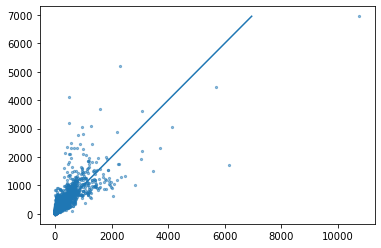

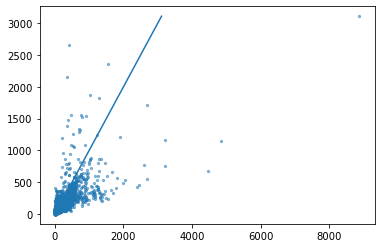

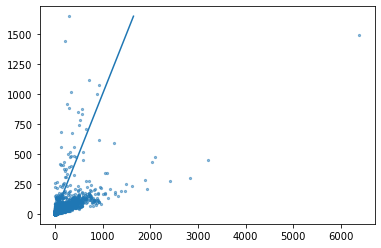

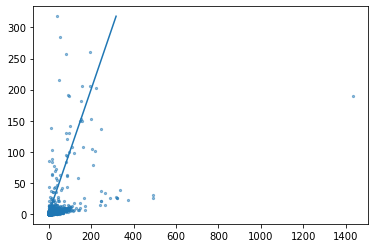

In [367]:
for thres in thresholds:
    x = []
    y = []
    for gid, tp, fp in scores[thres]:
        x.append(tp)
        y.append(fp)
#     plt.xscale('log')
#     plt.yscale('log')
    plt.scatter(x,y,s=5,alpha=0.5)
    m = min(max(x),max(y))
    plt.plot([0,m],[0,m])
    plt.show()